In [7]:
## Importing the libraries
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
%matplotlib inline  
import plotly.express as px # for interactive plots
from scipy.stats import shapiro, skew # for checking the normality of the data
from sklearn.linear_model import LogisticRegression # for logistic regression
lr = LogisticRegression() # defining the logistic regression model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
rf = RandomForestClassifier() # defining the random forest classifier model
from sklearn.neighbors import KNeighborsClassifier # for KNN classifier
knn = KNeighborsClassifier() # defining the KNN classifier model
from sklearn.model_selection import train_test_split # for splitting the data into train and test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score, precision_score, f1_score # for evaluating the model
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer # for standardizing the data
s_scaler = StandardScaler() # defining the standard scaler
m_scaler = MinMaxScaler() # defining the min max scaler
q_scaler = QuantileTransformer() # defining the quantile transformer
from sklearn.preprocessing import LabelEncoder # for encoding the categorical data
encoder = LabelEncoder() # defining the encoder
from warnings import filterwarnings # for ignoring the warnings
filterwarnings('ignore')

In [2]:
## Importing the dataset
df = pd.read_csv('Myers Briggs Table_S1.csv')
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [3]:
## Dropping the S No column
df1 = df.drop(['S No'], axis=1)
df1.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [68]:
df['AGE'].unique

<bound method Series.unique of 0     53
1     52
2     30
3     51
4     45
      ..
92    16
93    45
94    43
95    28
96    43
Name: AGE, Length: 97, dtype: int64>

In [88]:
df.groupby('MBTI').mean()

,S No,AGE,HEIGHT,WEIGHT,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P
MBTI,,,,,,,,,,,,,,,,
ENFJ,44.400000,33.000000,66.200000,163.200000,2.800000,5.200000,2.800000,3.400000,16.800000,4.200000,11.200000,14.400000,5.800000,18.000000,15.200000,6.800000
ENFP,62.400000,42.600000,65.000000,159.000000,2.200000,2.000000,1.500000,1.200000,17.600000,3.400000,8.800000,17.200000,5.500000,18.500000,3.500000,18.500000
ENTJ,47.000000,36.200000,67.800000,164.000000,1.100000,4.300000,1.700000,1.500000,17.200000,3.800000,10.400000,15.600000,12.600000,11.400000,15.400000,6.600000
ENTP,56.400000,47.800000,65.600000,194.600000,1.800000,3.700000,0.600000,4.400000,16.600000,4.400000,9.200000,16.800000,17.600000,6.400000,6.400000,15.400000
ESFJ,54.909091,45.727273,64.909091,156.636364,2.363636,2.590909,1.954545,3.636364,15.000000,6.000000,17.909091,9.909091,8.000000,15.818182,14.909091,7.090909
ESFP,56.416667,40.583333,64.916667,154.500000,2.333333,3.916667,1.125000,1.833333,16.083333,4.916667,17.000000,8.916667,7.083333,16.750000,5.916667,16.083333
ESTJ,38.571429,55.285714,65.714286,165.142857,1.714286,3.428571,2.928571,4.785714,14.285714,6.714286,17.428571,8.571429,14.428571,9.571429,16.428571,5.571429
ESTP,44.000000,39.800000,67.100000,163.200000,1.200000,3.200000,1.700000,2.850000,16.200000,4.800000,19.100000,6.900000,16.100000,7.900000,6.800000,15.200000
INFJ,34.750000,36.250000,65.750000,136.500000,2.500000,4.875000,5.000000,2.750000,5.250000,15.250000,13.750000,12.250000,8.000000,16.000000,15.250000,6.750000


In [81]:
df_c = df1.copy()
Less_20 = df_c['AGE'] < 20
df_c.loc[Less_20, 'AGE'] = 0
Between_20_30 = (df_c['AGE'] >= 20) & (df_c['AGE'] < 30)
df_c.loc[Between_20_30, 'AGE'] = 1
Between_30_40 = (df_c['AGE'] >= 30) & (df_c['AGE'] < 40)
df_c.loc[Between_30_40, 'AGE'] = 2
Between_40_50 = (df_c['AGE'] >= 40) & (df_c['AGE'] < 50)
df_c.loc[Between_40_50, 'AGE'] = 3
Between_50_60 = (df_c['AGE'] >= 50) & (df_c['AGE'] < 60)
df_c.loc[Between_50_60, 'AGE'] = 4
Between_60_70 = (df_c['AGE'] >= 60) & (df_c['AGE'] < 70)
df_c.loc[Between_60_70, 'AGE'] = 5
Between_70_80 = (df_c['AGE'] >= 70) & (df_c['AGE'] < 80)
df_c.loc[Between_70_80, 'AGE'] = 6
Between_80_90 = (df_c['AGE'] >= 80) & (df_c['AGE'] < 90)
df_c.loc[Between_80_90, 'AGE'] = 7


In [83]:
df_c.head()
df_c['AGE'].value_counts()

3    27
4    17
5    14
1    14
2    10
0    10
6     3
7     2
Name: AGE, dtype: int64

## Step 3: Age factor in each personality count.

In [4]:
df1["MBTI"].value_counts()

ESFP    12
ESFJ    11
ESTP    10
ENFP    10
ESTJ     7
ISFP     7
ISTJ     6
ENFJ     5
ENTP     5
ISFJ     5
ENTJ     5
INFP     5
ISTP     4
INFJ     4
INTJ     1
Name: MBTI, dtype: int64

In [42]:
fig = px.bar(df, x='MBTI', y=("AGE"), title='Age Distribution of MBTI Types', color='MBTI', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show() 

Activity level of each personality types.

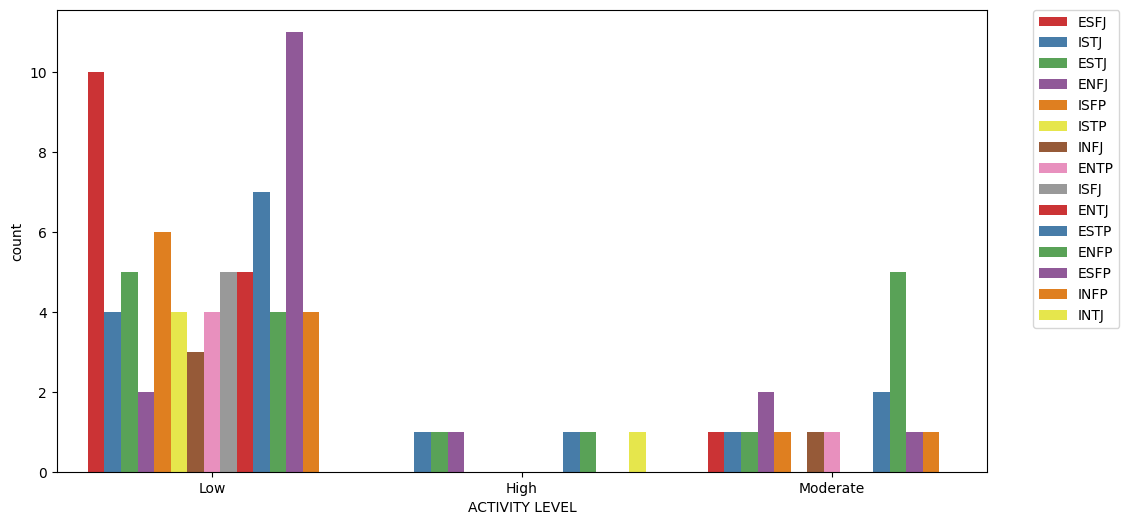

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(x='ACTIVITY LEVEL', data=df1, hue='MBTI', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

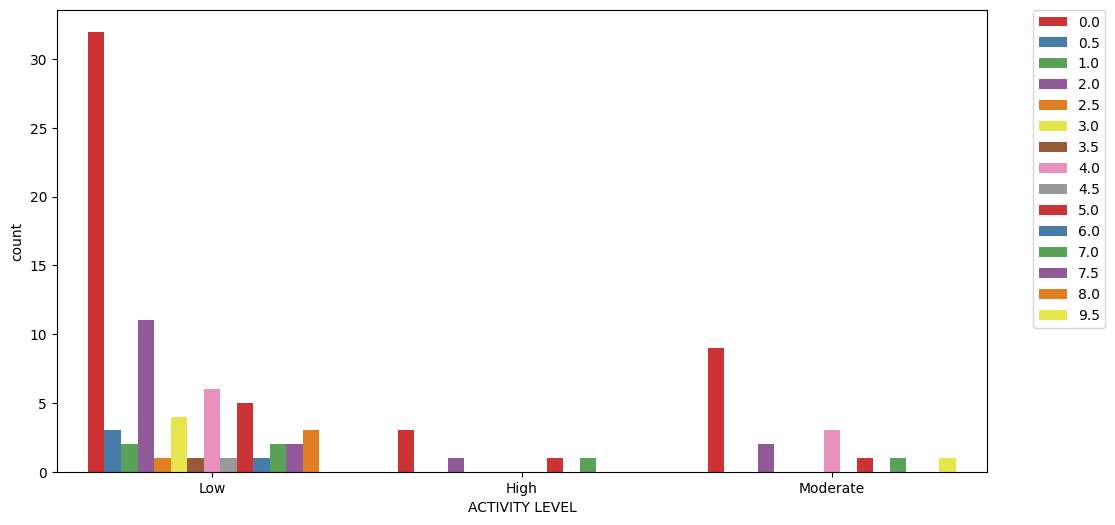

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x='ACTIVITY LEVEL', data=df1, hue='PAIN 1', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

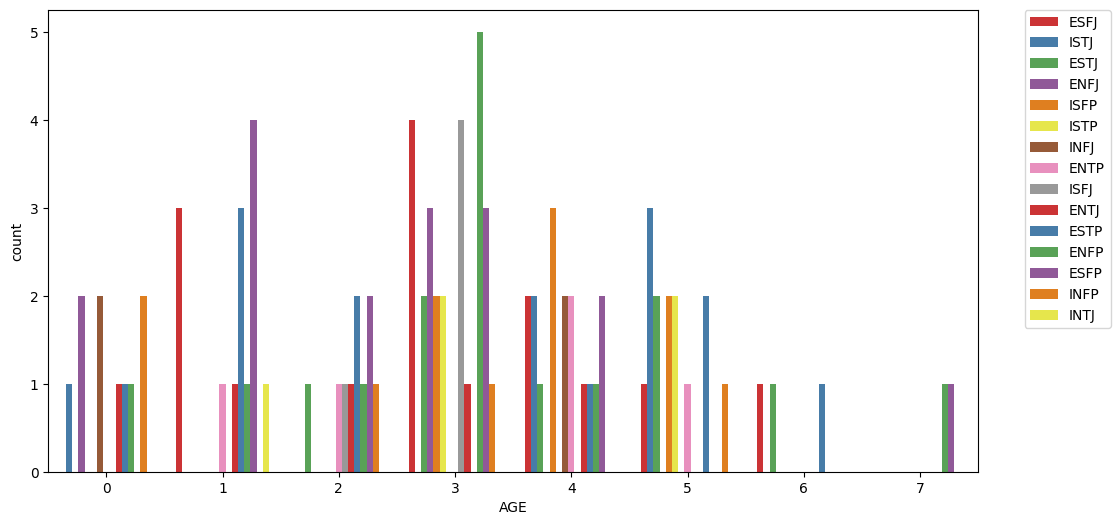

In [103]:
plt.figure(figsize=(12,6))
sns.countplot(x='AGE', data=df_c, hue='MBTI', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot: xlabel='POSTURE', ylabel='count'>

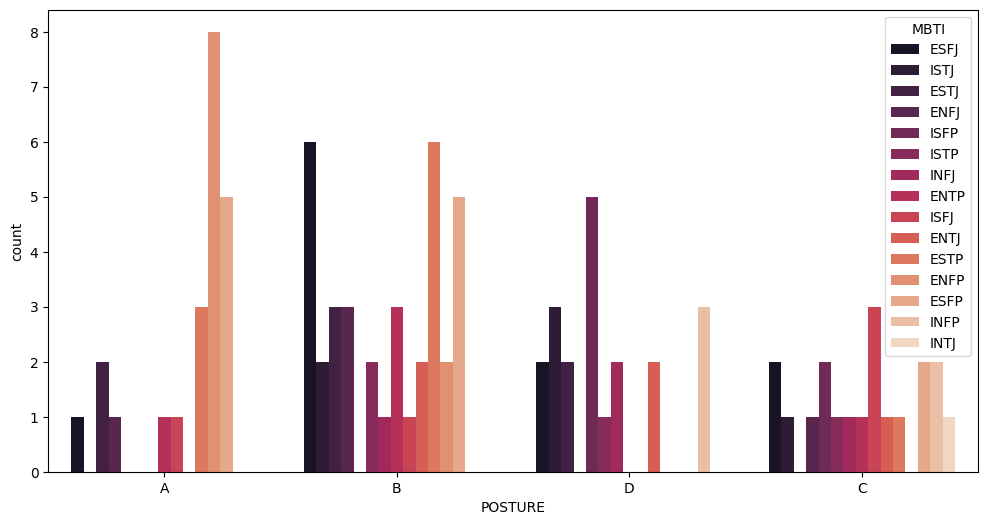

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(x='POSTURE', hue='MBTI', data=df, palette='rocket')


In [ ]:
df.groupby('MBTI').mean()

In [104]:
def make_plot():
    plt.figure(figsize=(25,15))
    plt.subplot(221)
    sns.countplot(x='PAIN 1', hue='MBTI', data=df, palette='Set1')
    plt.title('Original Data')
    plt.subplot(222)
    sns.countplot(x='PAIN 2', hue='MBTI', data=df, palette='Set1')
    plt.title('Logistic Regression')
    plt.subplot(223)
    sns.countplot(x='PAIN 3', hue='MBTI', data=df, palette='Set1')
    plt.title('Knn')
    plt.subplot(224)
    sns.countplot(x='PAIN 4', hue='MBTI', data=df, palette='Set1')
    plt.title('Voting Classifier')

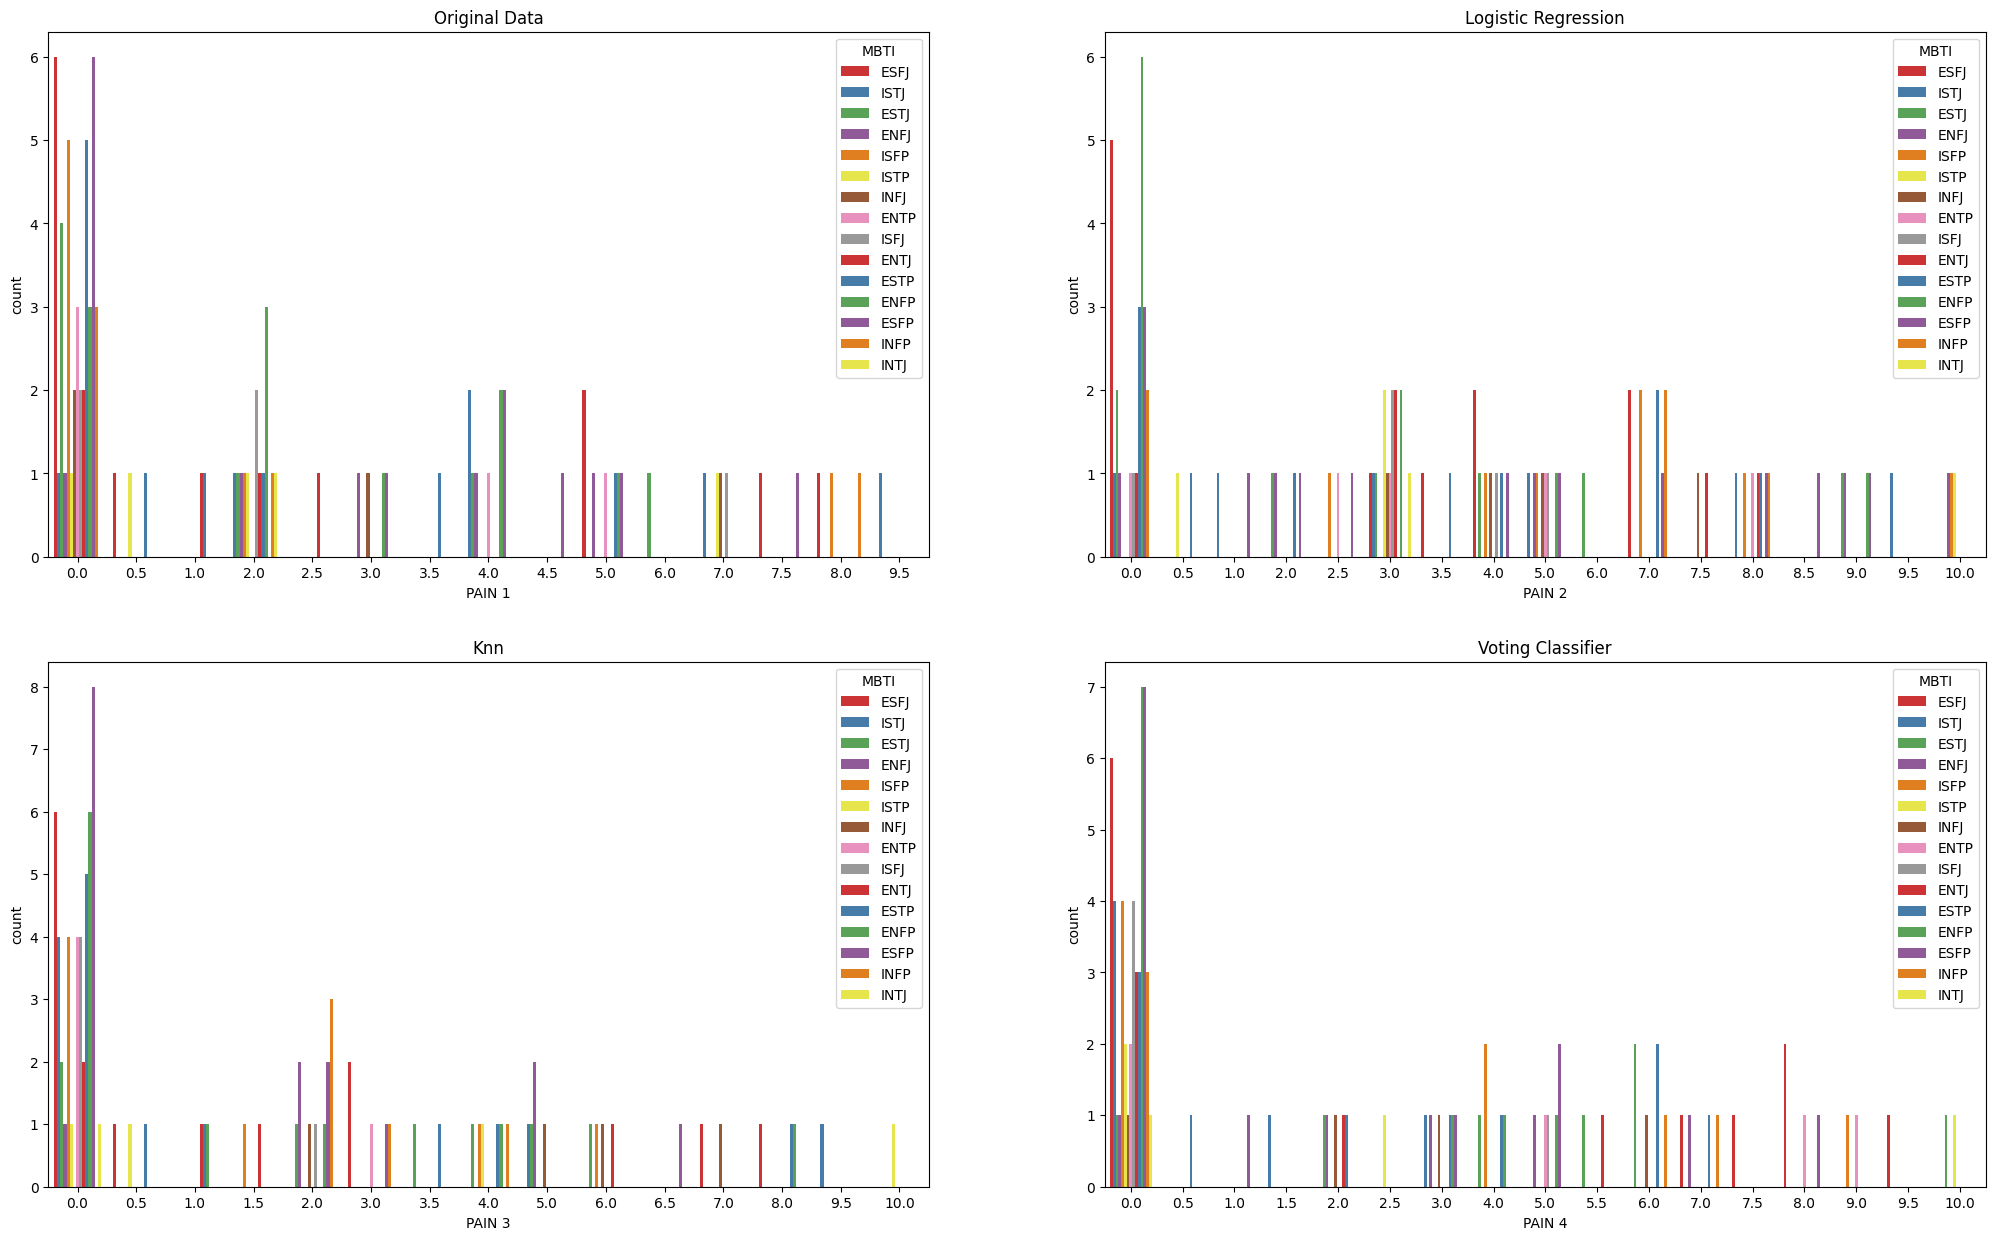

In [105]:
make_plot()